# Exercício 1 - Token Embeddings (Operações e Contextualização)

Conforme visto em sala de aula, existem várias técnicas de tokenização: word token, subword token, character token, byte token, dentre outras que podem obter resultados mistos. Esse Exercício abordará embeddings para word tokens, ou word embeddings. Nesse contexto, siga as instruções:

**a)** escolha no mínimo 2 grupos de palavras relacionadas, cada grupo contendo no mínimo 3 palavras.
Ex.:

*   Palavras relacionadas a paisagem
    *   ceu
    *   montanha
    *   rio
*   Palavras relacionadas a estudo
    *   caderno
    *   escola
    *   livro

**b)** Em seguida, obtenha os embeddings das palavras.

**c)** Utilize algum método de redução de dimensionalidade para reduzir os vetores dos embeddings para apenas 2 dimensões.

**d)** Faça o "plot" em um plano bidimensional com os valores obtidos, comparando os resultados referentes aos diferentes modelos.

**e)** Execute operações de soma e subtração com os vetores e observe os resultados obtidos.

**f)** Para comparar outras formas de gerar embeddings, utilize o modelo BERT de forma a gerar word embeddings a partir de frases e veja o resultado obtido.

**Sugestão:** Utilize bibliotecas para ter acesso a modelos pré-treinados

In [1]:
# !pip install gensim

A seguir, exemplo de código utilizando a lib gensim para carregar vetores de modelos pré-treinados como GloVe e Word2vec.

In [2]:
# Suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Usage suggestion
# Importing required libs
import numpy as np
import gensim.downloader as api
from gensim.models import KeyedVectors

# Printing the list of available models in gensim-data
print(list(api.info()["models"].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Os modelos sugeridos GloVe e Word2vec estão disponíveis a partir de 'glove-wiki-gigaword-100' e 'word2vec-google-news-300', respectivamente. Deve demorar alguns minutos dependendo do tamanho do modelo que você escolher.

In [3]:
# # Load the pre-trained model vectors using the "load()" method of the api object
# glove = api.load("fasttext-wiki-news-subwords-300")

# # Save the pre-trained model for reuse
# glove.save("glove_model.model")

In [4]:
glove = KeyedVectors.load("../models/glove_model.model")

In [5]:
# Check the size of a word vector
print(glove["casa"].shape)

(300,)


### **Exercício**
**a)** Escolha suas palavras, inicialmente em idioma inglês.

In [6]:
# English words
words = [
    "student",
    "teacher",
    "paper",
    "book",
    "notebook",
    "laptop",
    "university",
    "course",
    "exchange",
    "science",
    "learning",
    "research",
    "education",
]

Agora obtenha os embeddings do modelo carregado anteriormente acessando a chave no vetor.

In [7]:
# The model works like a dictionary, access the key corresponding to the token
# Get embeddings in a dictionary
emb_palavras = {word: glove[word] for word in words}
emb_palavras

# Printing the first 5 values ​​for each embedding
# print(emb_palavras[:, :5])

{'student': array([-5.6568e-02,  6.4876e-04,  6.0860e-02,  1.0752e-02, -1.1552e-02,
        -6.6364e-02,  2.5499e-02, -1.2159e-01,  8.8149e-02, -4.0149e-02,
         3.9893e-02,  7.4020e-04,  7.8832e-02,  4.4735e-02, -2.4260e-02,
         5.6595e-02,  6.8587e-02,  2.5037e-02,  3.9105e-02,  6.4854e-02,
         2.9919e-02,  6.9002e-02, -3.8209e-02,  6.7215e-02, -5.1773e-02,
         1.8131e-02, -1.9457e-02,  3.4926e-02, -8.0168e-03, -1.1301e-02,
         1.0423e-02,  2.2488e-03,  4.2361e-03, -1.0895e-02, -2.0003e-02,
         4.2685e-02,  3.2519e-02,  3.6706e-02,  1.0141e-03, -3.5115e-04,
         1.9556e-02, -9.7429e-02,  2.9501e-02,  1.4988e-02,  4.2061e-02,
         2.6522e-02,  5.5183e-02, -4.7938e-02, -2.8623e-02,  2.4995e-02,
         1.4879e-02,  1.2766e-02,  2.7079e-02,  3.9855e-02,  3.4777e-02,
         7.8763e-03, -3.9915e-02,  9.9666e-03, -1.7005e-02, -1.8460e-03,
         4.6363e-02,  1.2280e-02,  7.6400e-02,  7.1919e-02,  4.7603e-02,
        -6.0408e-02,  5.4660e-02, -2.962

Teste os modelos carregandos tentando imprimir algumas palavras em português veja o que acontece. Lembre que o modelo foi treinado sem caracteres acentuados ou case do caractere.

In [8]:
print(glove["terra"].shape)
pl_ptbb = glove["terra"]
print(pl_ptbb)

# print(w2v_v['gente'].shape)

(300,)
[-0.024405   -0.0043346  -0.011769    0.11453     0.023041   -0.09168
  0.0094031  -0.14461     0.0035586   0.069339   -0.050251   -0.011979
 -0.053855    0.019425   -0.047674    0.032493    0.17906     0.043017
  0.054907   -0.029625   -0.11605     0.049639    0.14474     0.037841
  0.14143     0.0010015   0.050475    0.052853    0.015726    0.0085179
 -0.00057323  0.070841   -0.028111    0.029294   -0.031062    0.010723
  0.056798   -0.031985    0.049969   -0.021129   -0.034351   -0.047213
  0.023057   -0.012029   -0.05057    -0.17281    -0.0068876   0.046897
 -0.1099     -0.1134      0.0054056  -0.057539    0.058319   -0.05241
 -0.039214    0.011012   -0.013798    0.031996    0.0034696   0.051652
 -0.034715    0.0052073   0.076233   -0.049084    0.11352    -0.13398
  0.057226    0.075949    0.083673    0.026268   -0.088492    0.040667
  0.042617    0.034032    0.1301     -0.071195   -0.10635    -0.083051
 -0.08793     0.034936    0.02056    -0.092008    0.078329    0.046256
 

Perceba que estamos utilizando modelos pré-treinados com corpus do idioma inglês. Portanto, no corpus ficaram faltando muitas palavras de outros idiomas como o português.

Faça o download do arquivo pré-treinado em Word2Vec do FastText no endereço https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec e carregue-o em uma variável.

**Sugestão:** Faça o download com o comando wget e utilize o método load_word2vec_format() do KeyedVectors da lib gensim.

In [9]:
# Download the file
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.pt.vec

In [10]:
# Load the model from the downloaded file
fasttext_model = KeyedVectors.load_word2vec_format("../models/wiki.pt.vec")

Escolha suas palavras agora em português e salve em um vetor.

In [11]:
palavras = [
    "atleta",
    "jogo",
    "equipe",
    "corrida",
    "derrota",
    "campeonato",
    "partida",
    "jogador",
    "torcida",
    "campo",
    "esporte",
]

### **Exercício**
**b)** Crie um novo vetor que receberá os embeddings correspondentes às palavras em português que você escolheu.

In [12]:
embeddings_pt ={word: fasttext_model[word] for word in palavras}
embeddings_pt

{'atleta': array([ 3.4701e-01, -3.4115e-01, -4.5211e-01, -6.6824e-01, -1.6294e-01,
         8.0927e-02,  2.5400e-01, -1.8500e-01, -1.1926e-01, -1.9098e-01,
        -3.0370e-02,  2.1974e-01, -2.0039e-01,  4.4922e-01, -2.5092e-01,
        -4.6118e-02,  1.6127e-01, -2.4933e-01, -1.6935e-01, -3.8990e-01,
        -8.7629e-02, -6.0859e-01, -2.7646e-01, -6.3464e-01,  2.1518e-01,
         7.6358e-03, -4.6535e-01, -4.4099e-01,  5.5954e-01, -6.5661e-02,
         1.6019e-01, -5.2065e-01,  9.3517e-02,  2.7311e-01,  2.3549e-01,
        -3.5942e-01,  3.4238e-01,  2.7153e-01, -3.4958e-01, -1.5123e-01,
        -7.8642e-02, -2.7413e-01, -6.2000e-02,  2.8866e-01, -6.1688e-01,
         2.8139e-01,  8.0859e-02,  3.6311e-01,  3.5700e-01, -1.3827e-01,
        -3.4098e-01,  5.5391e-02, -1.5800e-01,  3.3029e-02, -2.0157e-01,
        -1.0700e-01,  2.4118e-01, -2.1785e-01, -4.3774e-01,  7.8829e-02,
        -1.9681e-01,  3.2732e-01, -5.3544e-01, -4.2123e-01, -1.2729e-01,
        -3.0992e-01, -3.0246e-01, -2.2133

### **Exercício**
**c)** Utilize algum método de redução de dimensionalidade para reduzir os vetores dos embeddings para apenas 2 dimensões.

**Sugestão:** Utilize o PCA do sklearn passando como parâmetro n_components=2.

In [13]:
# Importing required libs
from sklearn.decomposition import PCA

# Reduce to 2 dimensions using PCA method
emb_pt_values = embeddings_pt.values()
emb_pt_values = np.array(list(emb_pt_values))

vectors_pca = PCA(n_components=2).fit_transform(emb_pt_values)
vectors_pca

array([[-1.9173397 ,  0.4311793 ],
       [ 1.1479172 ,  0.6759047 ],
       [-0.27638984, -0.71681416],
       [ 0.21960424, -0.032242  ],
       [ 2.5930471 , -1.6651993 ],
       [-1.5576173 , -2.548515  ],
       [ 1.3085841 , -0.6195977 ],
       [-0.35286278,  1.1483053 ],
       [-0.55726814, -0.19448559],
       [ 1.3366294 ,  2.4878702 ],
       [-1.9443035 ,  1.0335962 ]], dtype=float32)

### **Exercício**
**d)** Faça o "plot" em um plano bidimensional com os valores obtidos, se possível, comparando os resultados referentes a diferentes modelos.

**Sugestão:** Utilize o código da célula abaixo como exemplo de como efetuar o plot, sendo necessário ajustar a variável que contém os vetores PCA, bem como os rótulos com as palavras selecionadas.

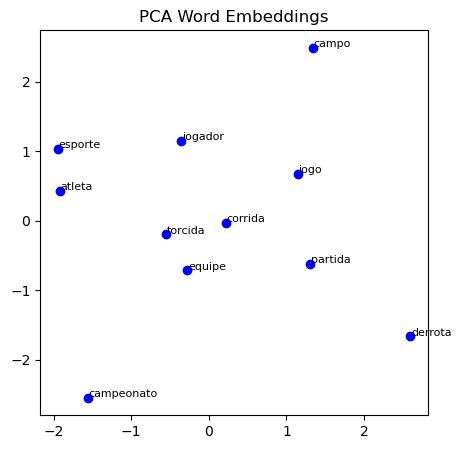

In [14]:
# Plotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(vectors_pca[:, 0], vectors_pca[:, 1], color="blue")

for i, p in enumerate(palavras):
    axes.annotate(p, (vectors_pca[i, 0] + 0.01, vectors_pca[i, 1] + 0.01), fontsize=8)

axes.set_title("PCA Word Embeddings")
plt.show()

Agora que você já sabe, faça um teste com outras palavras e veja como fica o plot do gráfico.

In [15]:
# Inicie aqui definindo suas variáveis

others_words = [
    "chute",
    "gol",
    "pista",
    "quadra",
    "rede",
    "atacar",
    "defesa",
    "grupo",
    "marcar",
    "passo",
    "salto",
    "tecnico",
    "tempo",
    "bola",
    "cesta",
    "golfe",
    "luta",
    "aluno",
    "professor",
    "papel",
    "livro",
    "notebook",
    "universidade",
    "curso",
    "pesquisa",
]

embeddings_pt ={word: fasttext_model[word] for word in others_words}

# Reduce to 2 dimensions using PCA method
emb_pt_values = embeddings_pt.values()
emb_pt_values = np.array(list(emb_pt_values))

vectors_pca = PCA(n_components=3).fit_transform(emb_pt_values)
vectors_pca

array([[ 3.2034183 , -2.2224553 , -0.42824605],
       [ 2.7547574 , -2.2426944 ,  0.11527344],
       [ 0.7245602 ,  1.8911474 , -1.9714311 ],
       [ 1.033125  ,  1.812467  , -1.1662413 ],
       [-0.543955  ,  1.1272653 ,  0.63642615],
       [ 0.23505817,  0.25552177,  2.0975716 ],
       [-0.08170866, -0.17399533,  1.8297396 ],
       [-0.8011893 ,  0.59027463,  0.7814402 ],
       [ 1.2689246 , -0.49754477,  0.9143527 ],
       [-0.33787453,  0.5638869 ,  0.23838022],
       [ 0.488098  ,  0.7954797 , -1.7981807 ],
       [-0.09152577, -2.0245376 , -0.83368486],
       [-0.13791503,  0.22293727,  0.72692376],
       [ 2.3801684 ,  0.34088764, -0.23664898],
       [ 1.2162243 ,  1.0630214 ,  0.46002144],
       [ 0.71829367,  1.5657067 , -1.3841832 ],
       [-0.01603822,  0.26129308,  1.1057689 ],
       [-1.8703638 , -1.2603034 , -1.0696186 ],
       [-2.118762  , -1.2097899 , -1.0278655 ],
       [-0.94905317,  0.3359042 ,  1.0040216 ],
       [-0.9559192 ,  0.2931699 ,  0.943

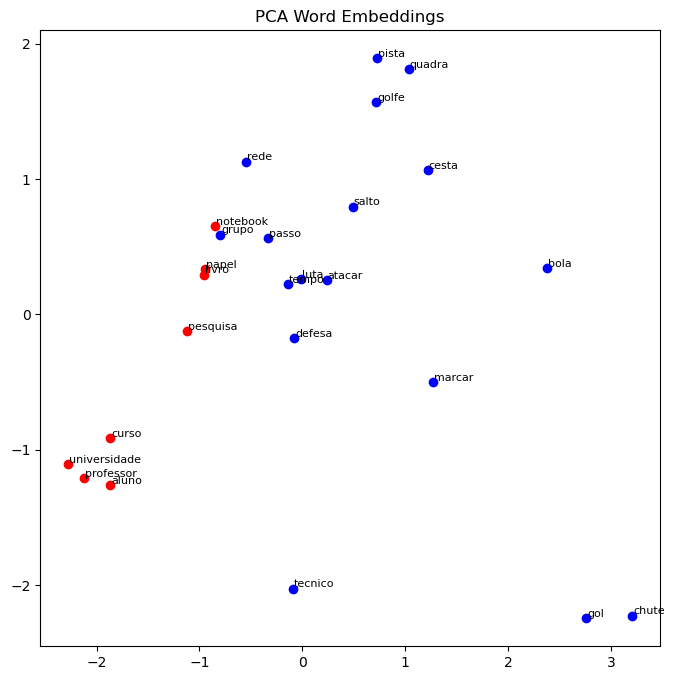

In [16]:
# Plotting
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

axes.scatter(vectors_pca[:17, 0], vectors_pca[:17, 1], color="blue")
axes.scatter(vectors_pca[17:, 0], vectors_pca[17:, 1], color="red")

for i, p in enumerate(others_words):
    axes.annotate(p, (vectors_pca[i, 0] + 0.01, vectors_pca[i, 1] + 0.01), fontsize=8)

axes.set_title("PCA Word Embeddings")
plt.show()

### Word2Vec algebra
### **Exercício**

**e)** Execute operações de soma e subtração com os vetores e observe os resultados obtidos.

**Sugestão:** Você pode utilizar o método "most_similar()" do modelo, utilizando os parâmetros "positive" e "negative" para operações de soma e subtração. O parâmetro "topn" controla a quantidade de resultados.

**Observação:** Caso prefira utilizar numpy para as operações, ao chamar o método "most_similar()" utilize o parâmetro "vector".

In [17]:
# Define the words
palavra1 = "rei"
palavra2 = "mulher"
palavra3 = "homem"

# Perform the algebraic operation
fasttext_model.most_similar(positive=[palavra1, palavra2], negative=[palavra3], topn=1)

[('rainha', 0.6602969765663147)]

Espaço para testar mais operações

In [18]:
# Define the words
palavra1 = "bom"
palavra2 = "mal"
palavra3 = "bem"

# Perform the algebraic operation
fasttext_model.most_similar(positive=[palavra1, palavra2], negative=[palavra3], topn=3)

[('péssimo', 0.57002854347229),
 ('mau', 0.5613446235656738),
 ('ruim', 0.5061343908309937)]

### Word2Vec vs BERT: Embeddings em contextos diferentes

Nos modelos representativos mais complexos, como o BERT, o cáculo dos valores de embedding de uma palavra pode depender dramáticamente da aplicação na frase. Isso não é por acaso e faz total sentido, pois a semântica pode ser totalmente diferente.

Por exemplo, observe a plavra 'manga' nas duas senteças abaixo:


*   "Sujei a manga da minha camisa."
*   "Quero comer manga com leite."


Vamos testar o quanto o modelo consegue capturar o contexto na tokenização incluindo agora o BERT.

### **Exercício**
**f)** Para comparar outras formas de gerar embeddings, utilize o modelo BERT de forma a gerar word embeddings a partir de frases e veja o resultado obtido.

O código a seguir vai auxiliar na instanciação do modelo BERT e definição de uma função para ter acesso facilitado aos embeddings do modelo.


In [ ]:
# Imports
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity


tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")


# Function to get BERT embeddings
def get_bert_embeddings(sentence, word):
    inputs = tokenizer(sentence, return_tensors="pt")
    outputs = model(**inputs)

    last_hidden_states = outputs.last_hidden_state
    
    word_tokens = tokenizer.tokenize(sentence)
    word_index = word_tokens.index(word)
    word_embedding = last_hidden_states[0, word_index + 1, :]
    
    return word_embedding

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### **Exercício**
**f)** (Detalhamento) Defina duas sentenças que contenham uma mesma palavra em ambas, porém com semântica diferente. Em seguide calcule os embeddings da mesma palavra nas duas sentenças, para finalmente comparar os resultados.

**Dica:** Utilize o método definido anteriormente, passando a sentença e a palavra que você deseja obter o embedding.

In [38]:
# Define your sentences
sentenca1 = "A mina de carvão foi fechada."
sentenca2 = "Cuidado, pois existe uma mina terrestre no caminho."

# Define the word focus
palavra = "mina"

# Calculate the word embeddings in both situations
word_embedding1 = get_bert_embeddings(sentenca1, palavra)
word_embedding2 = get_bert_embeddings(sentenca2, palavra)

# Print the calculated embeddings
print(word_embedding1)
print(word_embedding2)

tensor([ 7.7194e-01,  8.0342e-02, -2.0783e-01, -6.6471e-01,  5.1157e-01,
         7.0346e-01,  4.4305e-01,  3.4556e-01,  3.0056e-01, -3.9069e-01,
         1.7724e-01, -3.7132e-01,  1.7769e-01,  2.9472e-01, -9.7686e-01,
         1.5644e-01,  2.5025e-01, -1.5477e-01,  1.2423e-01,  7.6394e-02,
        -4.1995e-01, -4.8792e-01, -5.2059e-01,  2.3041e-01,  2.9852e-01,
         4.7578e-02, -4.1908e-01,  4.7826e-01, -3.6852e-01,  3.4471e-01,
        -7.4864e-02,  2.4479e-01, -8.3786e-02, -1.5243e-01, -5.3643e-01,
        -2.1250e-01,  2.0238e-01, -5.7107e-02,  2.3859e-02,  5.1070e-01,
         1.8479e-01, -2.6069e-01, -1.5017e-01, -7.3647e-02,  4.5884e-01,
         1.7241e-01,  5.5601e-01,  2.7992e-01,  3.5759e-03,  1.4019e-01,
        -8.6815e-01,  9.4867e-01, -1.4296e+00,  7.0946e-02,  1.9233e-01,
         7.2632e-01, -4.2107e-01,  5.7230e-01,  3.0107e-01, -1.1608e-01,
        -4.2036e-01,  3.6963e-01,  6.6214e-01, -2.5419e-01,  3.0005e-01,
        -3.1723e-01, -5.5912e-01,  3.0730e-01,  7.0

In [39]:
# In addition, calculate the similarity
word_embedding1 = word_embedding1.detach()
word_embedding2 = word_embedding2.detach()

word_embedding1 = word_embedding1.numpy()
word_embedding2 = word_embedding2.numpy()

word_embedding1 = word_embedding1.reshape(1, -1)
word_embedding2 = word_embedding2.reshape(1, -1)

similarity = cosine_similarity(word_embedding1, word_embedding2)
print(similarity)

[[0.70614004]]
